In [4]:
# Import libraries
import requests, json
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [9]:
# using Postman we found that the list comes from a json file
url = 'https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json'
r = requests.get(url)
universityJson = json.loads(r.text)

In [10]:
# Let's get the top 200 and display the top 5
pd.set_option('display.max_columns', 500)
top200 = pd.DataFrame(universityJson['data'])[:200]
top200.head()

,aliases,location,member_level,name,nid,rank,rank_order,record_type,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,scores_overall,scores_overall_rank,scores_research,scores_research_rank,scores_teaching,scores_teaching_rank,stats_female_male_ratio,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio,subjects_offered,url
0,University of Oxford,United Kingdom,0,University of Oxford,468,1,10,master_account,99.1,15,63.7,169,95.0,24,94.3,10,99.5,1,86.7,5,46 : 54,"20,409",38%,11.2,"Archaeology,Art, Performing Arts & Design,Biol...",/world-university-rankings/university-oxford
1,University of Cambridge,United Kingdom,0,University of Cambridge,470,2,20,master_account,97.5,29,51.5,260,93.0,35,93.2,20,97.8,3,87.8,3,45 : 55,"18,389",35%,10.9,"Archaeology,Architecture,Art, Performing Arts ...",/world-university-rankings/university-cambridge
2,California Institute of Technology caltech,United States,0,California Institute of Technology,128779,=3,30,private,99.5,10,92.6,51,59.7,322,93.0,30,97.5,4,90.3,1,31 : 69,"2,209",27%,6.5,"Architecture,Biological Sciences,Business & Ma...",/world-university-rankings/california-institut...
3,Stanford University,United States,11,Stanford University,467,=3,40,private,99.9,4,60.5,189,77.6,162,93.0,40,96.7,5,89.1,2,42 : 58,"15,845",22%,7.5,"Archaeology,Architecture,Art, Performing Arts ...",/world-university-rankings/stanford-university
4,Massachusetts Institute of Technology,United States,0,Massachusetts Institute of Technology,471,5,50,private,100.0,1,88.4,63,87.6,81,92.5,50,91.9,9,87.3,4,37 : 63,"11,177",34%,8.7,"Architecture,Art, Performing Arts & Design,Bio...",/world-university-rankings/massachusetts-insti...


In [11]:
locationData = pd.DataFrame()
for index, row in top200.iterrows():
    nid = row['nid']
    #comparisonLink = 'https://www.timeshighereducation.com/sites/default/files/university/comparison/'+str(nid)+'.json'
    #rankingsLink = 'https://www.timeshighereducation.com/sites/default/files/university/rankings/'+str(nid)+'.json'
    locationLink = 'https://www.timeshighereducation.com/sites/default/files/institution_markers/gmap_'+str(nid)+'.json'
    rLocation = requests.get(locationLink)
    if rLocation.ok:
        locationJson = json.loads(rLocation.text)
        locationDF = pd.DataFrame(locationJson)
        locationData = locationData.append(locationDF, ignore_index=True)
 
locationData.head()

,country,lat,lng,locality,path,postal_code,thoroughfare,title
0,United Kingdom,51.757701873800,-1.263959050200,Oxford,node/468,OX1 2JD,University Offices,University of Oxford
1,United Kingdom,52.204959869400,0.116093002300,Cambridge,node/470,CB2 1TN,The Old Schools,University of Cambridge
2,United States,34.135951995900,-118.125633239700,Pasadena,node/128779,91125,1200 East California Boulevard,California Institute of Technology
3,United States,37.427658081100,-122.170066833500,Stanford,node/467,94305–2004,450 Serra Mall,Stanford University
4,United States,42.360091000000,-71.094160000000,Cambridge,node/471,02139-4307,77 Massachusetts Avenue,Massachusetts Institute of Technology


In [12]:
# Add location data to top200 dataframe
locationData = locationData.rename(columns={'title':'name'})
top200 = pd.merge(top200, locationData, on='name')

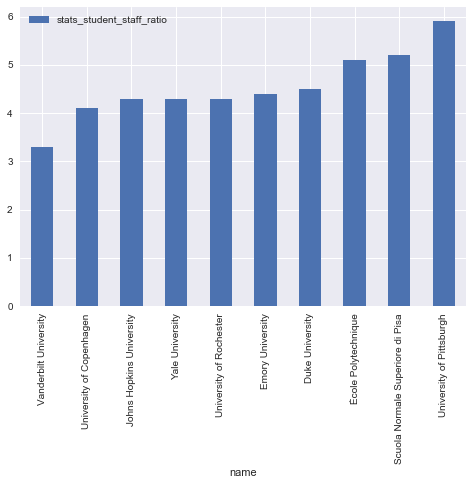

In [13]:
# Which are the best universities in term of: (a) ratio between faculty members and students
# The stats_student_staff_ratio values seem to be stored as str so let's fix it
top200.stats_student_staff_ratio = top200.stats_student_staff_ratio.apply(pd.to_numeric)
# Sort based on the ratio (lower better) and take the top 10
topfacultyratio = top200.sort_values('stats_student_staff_ratio',ascending=True)[:10][['name','stats_student_staff_ratio']]

topfacultyratio[:10].plot(x='name',y='stats_student_staff_ratio', kind='bar')
plt.show()



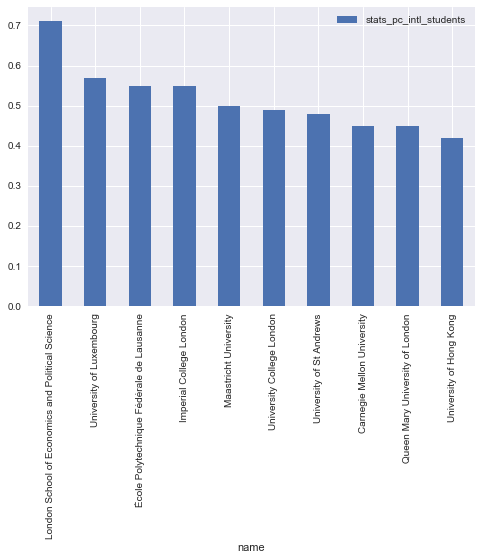

In [14]:
# Which are the best universities in term of: (b) ratio of international students
# The stats_pc_intl_students is stored as percentage, let's make it ratio
def p2f(x):
    if type(x) == str:
        return float(x.strip('%'))/100
    elif type(x) == float:
        return x
    else:
        raise('Not correct type')

top200.stats_pc_intl_students = top200.stats_pc_intl_students.apply(p2f)
# Sort based on the ratio (higher better) and take top 10
topintlstudents = top200.sort_values('stats_pc_intl_students',ascending=False)[:10][['name','stats_pc_intl_students']]

topintlstudents[:10].plot(x='name',y='stats_pc_intl_students', kind='bar')
plt.show()

In [15]:
# Answer the previous question aggregating the data by (c) country
# Group student staff ratio by country and take the mean
topFacultyRatioCountries = top200.groupby('country')['stats_student_staff_ratio'].mean()
# Take the top ten (lower better)
topFacultyRatioCountries = topFacultyRatioCountries.sort_values(ascending=True)[:10]

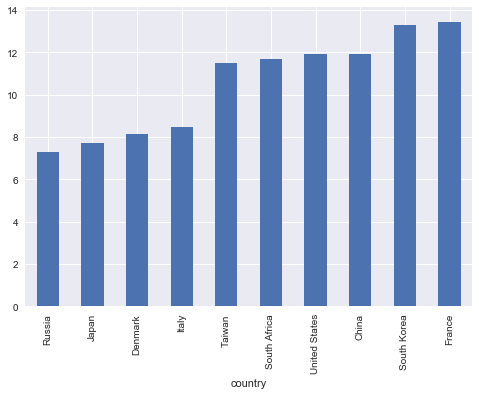

In [16]:
topFacultyRatioCountries.plot(x='country',kind='bar')
plt.show()

In [17]:
# And the same for the international student ratio
topInternationalStudentCountries = top200.groupby('country')['stats_pc_intl_students'].mean()
# Take the top ten (higher better)
topInternationalStudentCountries = topInternationalStudentCountries.sort_values(ascending=False)[:10]

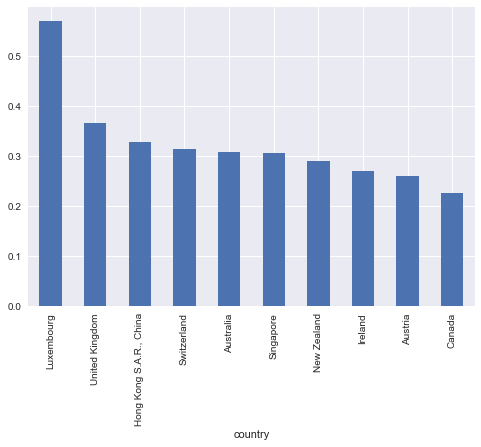

In [18]:
topInternationalStudentCountries.plot(x='country',kind='bar')
plt.show()

In [19]:
# We do the same by region (locality)
topFacRatLoc = top200.groupby(['country','locality'])['stats_student_staff_ratio'].mean()
topFacRatLoc = topFacRatLoc.sort_values(ascending=True)[:10]
topIntlStudentLoc = top200.groupby(['country','locality'])['stats_pc_intl_students'].mean()
topIntlStudentLoc = topIntlStudentLoc.sort_values(ascending=False)[:10]


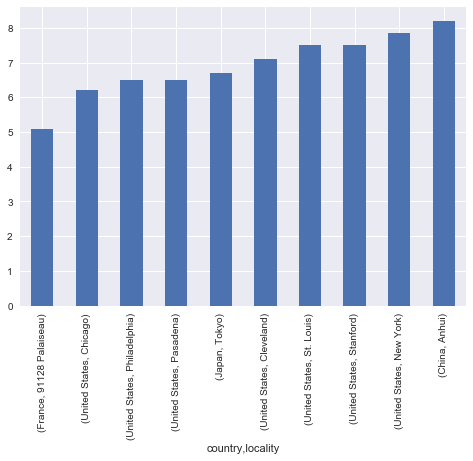

In [20]:
topFacRatLoc.plot(x=['country','locality'],kind='bar')
plt.show()

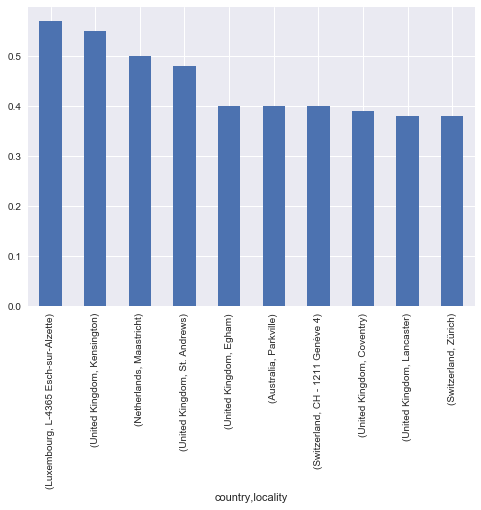

In [21]:
topIntlStudentLoc.plot(x=['country','locality'],kind='bar')
plt.show()

In [5]:
def import_json(url):
    r = requests.get(url)
    universityJson = json.loads(r.text)
    top200 = pd.DataFrame(universityJson['data'])[:200] #import the top200 universities
    return top200

def import_details_qs(top200): #requires special handling as international stud/fac data not available
    Intl_Data = pd.DataFrame()
    for index, row in top200.iterrows():
        nid = row['nid']
        Intl_link = 'https://www.topuniversities.com/node/'+str(nid)
        rIntl = requests.get(Intl_link)
        
        if rIntl.ok:
            page_body = rIntl.text
            soup = BeautifulSoup(page_body, 'html.parser')
            #Total n - faculty
            try :
                t_faculty = soup.find_all('div', class_='total faculty')[0].find('div', class_='number').text
                tot_fac_value = int(t_faculty[1:-1].replace(',',''))
            except:
                tot_fac_value = 0
            #Total n - international faculty
            try:
                t_interfaculty = soup.find_all('div',class_='inter faculty')[0].find('div',class_='number').text
                tot_intfac_value = int(t_interfaculty[1:-1].replace(',',''))
            except:
                tot_intfac_value = 0
            #Total n - students
            try:
                t_stud = soup.find_all('div', class_='total student')[0].find('div', class_='number').text
                tot_stud_value = int(t_stud[1:-1].replace(',',''))
            except:
                tot_stud_value = 0
            #Total n - international students
            try:
                t_intstud = soup.find_all('div', class_='total inter')[0].find('div', class_='number').text
                tot_intstud_value = int(t_intstud[1:-1].replace(',',''))
            except:
                tot_intstud_value = 0
            IntlDF = pd.DataFrame({'nid' : [nid],'total_faculty_members' : [tot_fac_value], 'international_faculty_members' : [tot_intfac_value], 'total_students' : [tot_stud_value], 'international_students' : [tot_intstud_value]})
            Intl_Data = Intl_Data.append(IntlDF, ignore_index=True)
    return Intl_Data

def import_details_times(top200):
    # Get the supplementary data from the university page
    locationData = pd.DataFrame()
    for index, row in top200.iterrows():
        nid = row['nid']
        #comparisonLink = 'https://www.timeshighereducation.com/sites/default/files/university/comparison/'+str(nid)+'.json'
        #rankingsLink = 'https://www.timeshighereducation.com/sites/default/files/university/rankings/'+str(nid)+'.json'
        locationLink = 'https://www.timeshighereducation.com/sites/default/files/institution_markers/gmap_'+str(nid)+'.json'
        rLocation = requests.get(locationLink)
        if rLocation.ok:
            locationJson = json.loads(rLocation.text)
            locationDF = pd.DataFrame(locationJson)
            locationData = locationData.append(locationDF, ignore_index=True)
    # Add location data to top200 dataframe
       #locationData = locationData.rename(columns={'title':'name'})
    #top200 = pd.merge(top200, locationData, on='name')
    return locationData

In [2]:
## QS International Rankings

In [6]:
%%time
top200_qs = import_json('https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt?_=1508492427994')
data_qs = import_details_qs(top200_qs)

CPU times: user 2min 2s, sys: 2.64 s, total: 2min 4s
Wall time: 2min 54s


In [25]:
top200_qs_full = pd.merge(top200_qs, data_qs, on='nid')
top200_qs_full.rename(columns={'title':'name'})
top200_qs_full.head()

,cc,core_id,country,guide,logo,nid,rank_display,region,score,stars,title,url,international_faculty_members,international_students,total_faculty_members,total_students
0,US,410,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294850,1,North America,100,6,Massachusetts Institute of Technology (MIT),/universities/massachusetts-institute-technolo...,1679,3717,2982,11067
1,US,573,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",297282,2,North America,98.7,5,Stanford University,/universities/stanford-university,2042,3611,4285,15878
2,US,253,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294270,3,North America,98.4,5,Harvard University,/universities/harvard-university,1311,5266,4350,22429
3,US,94,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294562,4,North America,97.7,5,California Institute of Technology (Caltech),/universities/california-institute-technology-...,350,647,953,2255
4,GB,95,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294561,5,Europe,95.6,5,University of Cambridge,/universities/university-cambridge,2278,6699,5490,18770


In [28]:
top200_qs

,cc,core_id,country,guide,logo,nid,rank_display,region,score,stars,title,url
0,US,410,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294850,1,North America,100,6,Massachusetts Institute of Technology (MIT),/universities/massachusetts-institute-technolo...
1,US,573,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",297282,2,North America,98.7,5,Stanford University,/universities/stanford-university
2,US,253,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294270,3,North America,98.4,5,Harvard University,/universities/harvard-university
3,US,94,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294562,4,North America,97.7,5,California Institute of Technology (Caltech),/universities/california-institute-technology-...
4,GB,95,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294561,5,Europe,95.6,5,University of Cambridge,/universities/university-cambridge
5,GB,478,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294654,6,Europe,95.3,5,University of Oxford,/universities/university-oxford
6,GB,365,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294014,7,Europe,94.6,None,UCL (University College London),/universities/ucl-university-college-london
7,GB,356,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294030,8,Europe,93.7,None,Imperial College London,/universities/imperial-college-london
8,US,120,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294536,9,North America,93.5,5,University of Chicago,/universities/university-chicago
9,CH,201,Switzerland,"<a href=""/where-to-study/europe/switzerland/gu...","<img src=""https://www.topuniversities.com/site...",294432,10,Europe,93.3,None,ETH Zurich - Swiss Federal Institute of Techno...,/universities/eth-zurich-swiss-federal-institu...


In [29]:
top200

,aliases,location,member_level,name,nid,rank,rank_order,record_type,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,scores_overall,scores_overall_rank,scores_research,scores_research_rank,scores_teaching,scores_teaching_rank,stats_female_male_ratio,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio,subjects_offered,url,country,lat,lng,locality,path,postal_code,thoroughfare
0,University of Oxford,United Kingdom,0,University of Oxford,468,1,10,master_account,99.1,15,63.7,169,95.0,24,94.3,10,99.5,1,86.7,5,46 : 54,"20,409",0.38,11.2,"Archaeology,Art, Performing Arts & Design,Biol...",/world-university-rankings/university-oxford,United Kingdom,51.757701873800,-1.263959050200,Oxford,node/468,OX1 2JD,University Offices
1,University of Cambridge,United Kingdom,0,University of Cambridge,470,2,20,master_account,97.5,29,51.5,260,93.0,35,93.2,20,97.8,3,87.8,3,45 : 55,"18,389",0.35,10.9,"Archaeology,Architecture,Art, Performing Arts ...",/world-university-rankings/university-cambridge,United Kingdom,52.204959869400,0.116093002300,Cambridge,node/470,CB2 1TN,The Old Schools
2,California Institute of Technology caltech,United States,0,California Institute of Technology,128779,=3,30,private,99.5,10,92.6,51,59.7,322,93.0,30,97.5,4,90.3,1,31 : 69,"2,209",0.27,6.5,"Architecture,Biological Sciences,Business & Ma...",/world-university-rankings/california-institut...,United States,34.135951995900,-118.125633239700,Pasadena,node/128779,91125,1200 East California Boulevard
3,Stanford University,United States,11,Stanford University,467,=3,40,private,99.9,4,60.5,189,77.6,162,93.0,40,96.7,5,89.1,2,42 : 58,"15,845",0.22,7.5,"Archaeology,Architecture,Art, Performing Arts ...",/world-university-rankings/stanford-university,United States,37.427658081100,-122.170066833500,Stanford,node/467,94305–2004,450 Serra Mall
4,Massachusetts Institute of Technology,United States,0,Massachusetts Institute of Technology,471,5,50,private,100.0,1,88.4,63,87.6,81,92.5,50,91.9,9,87.3,4,37 : 63,"11,177",0.34,8.7,"Architecture,Art, Performing Arts & Design,Bio...",/world-university-rankings/massachusetts-insti...,United States,42.360091000000,-71.094160000000,Cambridge,node/471,02139-4307,77 Massachusetts Avenue
5,Harvard University,United States,0,Harvard University,466,6,60,private,99.7,8,46.4,330,79.7,143,91.8,60,98.4,2,84.2,9,None,"20,326",0.26,8.9,"Agriculture & Forestry,Archaeology,Art, Perfor...",/world-university-rankings/harvard-university,United States,42.374599300000,-71.120480400000,Cambridge,node/466,02138,Massachusetts Hall
6,Princeton University,United States,0,Princeton University,469,7,70,private,99.6,9,58.0,204,78.7,152,91.1,70,93.9,6,85.7,7,45 : 55,"7,955",0.24,8.3,"Architecture,Art, Performing Arts & Design,Bio...",/world-university-rankings/princeton-university,United States,40.343988800000,-74.651448100000,None,node/469,08544,Princeton
7,Imperial College London,United Kingdom,0,Imperial College London,472,8,80,master_account,96.7,40,71.6,120,96.6,13,89.2,80,88.7,12,81.7,13,37 : 63,"15,857",0.55,11.4,"Biological Sciences,Chemical Engineering,Chemi...",/world-university-rankings/imperial-college-lo...,United Kingdom,51.498800000000,-0.174877000000,Kensington,node/472,SW7 2AZ,South Kensington Road
8,University of Chicago,United States,0,University of Chicago,473,9,90,private,99.4,12,39.8,487,69.6,231,88.6,90,90.1,10,85.3,8,44 : 56,"13,525",0.25,6.2,"Archaeology,Art, Performing Arts & Design,Biol...",/world-university-rankings/university-chicago,United States,41.788607900000,-87.598713300000,Chicago,node/473,60637,Edward H. Levi Hall
9,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,0,ETH Zurich – Swiss Federal Institute of Techno...,479,=10,100,master_account,94.3,60,60.3,190,98.1,8,87.7,100,92.0,8,76.4,21,31 : 69,"19,233",0.38,14.6,"Agriculture & Forestry,Architecture,Biological...",/world-university-rankings/eth-zurich-s

In [34]:
import difflib

In [35]:
d = difflib.Differ()

In [36]:
d.compare('Hallo', 'HAlló')

<generator object Differ.compare at 0x114164830>

In [53]:
difflib.SequenceMatcher(None, 'halló', 'HALLO (sf)'.lower()).ratio()

0.5333333333333333

In [42]:
difflib.SequenceMatcher?

In [85]:
import re
import unidecode
def makeStringSimple(s):
    s2 = s.lower()
    s2 = unidecode.unidecode(s2)
    s2 = re.sub("[\(\[].*?[\)\]]", "", s2)
    return s2
    

In [49]:
makeStringSimple("HALLÓÓ")

'halloo'

In [103]:
matches = []
highestScores = []
for index,row in top200.iterrows():
    name = makeStringSimple(row['name'])
    scores = []
    qs_nameList = list(top200_qs_full.title.values)
    for qsName in qs_nameList:
        scores.append(difflib.SequenceMatcher(None, name, makeStringSimple(qsName)).ratio())
        
    best = scores.index(max(scores))
    if max(scores) > 0.9:
        highestScores.append(max(scores))
        matches.append(qs_nameList[best])
    else:
        highestScores.append(0)
        matches.append(None)    

In [104]:
pd.set_option('display.max_rows', 500)
pd.DataFrame({'Times':list(top200['name']),'QS':matches, 'score': highestScores})

,QS,Times,score
0,University of Oxford,University of Oxford,1.000000
1,University of Cambridge,University of Cambridge,1.000000
2,California Institute of Technology (Caltech),California Institute of Technology,0.985507
3,Stanford University,Stanford University,1.000000
4,Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology,0.986667
5,Harvard University,Harvard University,1.000000
6,Princeton University,Princeton University,1.000000
7,Imperial College London,Imperial College London,1.000000
8,University of Chicago,University of Chicago,1.000000
9,ETH Zurich - Swiss Federal Institute of Techno...,ETH Zurich – Swiss Federal Institute of Techno...,0.934579
